## 이런 느낌?

### 데이터 불러오기

In [913]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False) # 마이너스 부호가 보일수 있게 하겠다
# pd.options.display.max_columns = None
df = pd.read_csv('./레이블합친최종본v2.csv',encoding='cp949')
# df = df.replace(1254789.63,np.nan)
# df['회생기업1'] = df['회생기업1'].fillna(0)
# df['회생기업2'] = df['회생기업2'].fillna(0)
# df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d-%m')
# df['재고자산회전율'] = df['재고자산회전율'].fillna(0)
# df['매입채무회전율'] = df['매입채무회전율'].fillna(0)
# df['매출채권_대_매입채무비율'] = df['매출채권_대_매입채무비율'].fillna(0)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,...,R & D 투자효율,통계청 한국표준산업분류 10차(소분류),매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업1,회생기업2
0,CMG제약,58820,2011-12,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,...,0.13,의약품 제조업,1,0,0,0,0,0,0,0
1,CMG제약,58820,2012-12,-7.75,109.15,-4.12,207.08,75.17,-8.43,28.34,...,0.74,의약품 제조업,0,0,0,0,1,1,0,0
2,CMG제약,58820,2013-12,0.70,-2.09,16.09,-18.89,55.10,25.51,38.70,...,0.66,의약품 제조업,0,0,0,0,0,0,0,0
3,CMG제약,58820,2014-12,3.60,3.86,74.30,-25.93,0.01,11.52,37.07,...,0.51,의약품 제조업,0,0,0,1,0,0,0,0
4,CMG제약,58820,2015-12,-32.22,-2.64,-5.37,-7.17,-4.48,18.85,36.26,...,3.08,의약품 제조업,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,흥아해운,3280,2015-12,1.02,21.93,49.36,-11.18,3.39,2.42,6.20,...,0.00,해상 운송업,0,0,0,0,0,0,0,0
8781,흥아해운,3280,2016-12,0.21,21.08,38.84,-25.08,11.22,-1.58,4.49,...,0.00,해상 운송업,0,1,0,0,0,1,0,0
8782,흥아해운,3280,2017-12,-0.42,-11.43,-16.50,13.29,-39.28,0.56,2.09,...,0.00,해상 운송업,0,0,0,0,0,0,0,0
8783,흥아해운,3280,2018-12,-1.16,-5.33,-12.07,-6.33,-37.42,-9.87,-0.93,...,0.00,해상 운송업,0,1,0,0,0,0,0,0


In [393]:
# df.to_csv('레이블합친최종본.csv',encoding='cp949',index=False)

In [394]:
df.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
이자보상배율                   0
총자산증가율                   0
유형자산증가율                  0
유동자산증가율                  0
자기자본증가율                  0
매출액증가율                   0
매출액총이익율                  0
매출액순이익율                  0
자기자본순이익율                 0
총자본영업이익율                 0
매출액영업이익률                 0
총자본순이익률                  0
총자본회전율                   0
재고자산회전율                  0
매출채권회전율                  0
유형자산회전율                  0
매입채무회전율                  0
자기자본회전율                  0
타인자본회전율                  0
유동자산회전율                  0
순운전자본회전율                 0
유동비율                     0
당좌비율                     0
현금비율                     0
부채비율                     0
차입금의존도                   0
CASH_FLOW_대_부채비율         0
CASH_FLOW_대_매출액비율        0
CASH_FLOW_대_차입금비율        0
자기자본구성비율                 0
당좌자산구성비율                 0
유동자산구성비율                 0
매출채권_대_매입채무비율            0
유동부채비율                   0
타

In [498]:
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,...,R & D 투자효율,통계청 한국표준산업분류 10차(소분류),매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업1,회생기업2
0,CMG제약,58820,2011-12,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,...,0.13,의약품 제조업,1,0,0,0,0,0,0,0
1,쌍방울,102280,2011-12,4.38,1.55,-5.21,5.98,9.85,12.94,27.66,...,0.10,봉제의복 제조업,0,0,0,0,0,1,0,0
2,파라텍,33540,2011-12,17.61,-5.54,4.28,-10.55,7.00,24.09,10.36,...,0.00,특수 목적용 기계 제조업,0,0,0,0,0,0,0,0
3,듀오백,73190,2011-12,10.84,1.76,-3.83,-10.14,-0.07,6.42,34.89,...,0.00,가구 제조업,0,0,0,0,0,1,0,0
4,웨이브일렉트로닉스,95270,2011-12,-15.27,-22.89,-11.86,-25.98,-21.78,-44.10,27.16,...,19.54,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,비덴트,121800,2019-12,-1.13,15.94,-13.16,-23.02,2.78,-13.04,34.33,...,6.24,통신 및 방송 장비 제조업,0,0,0,0,0,1,0,0
8781,범양건영,2410,2019-12,12.27,16.99,7.13,8.96,39.58,77.40,7.21,...,0.02,건물 건설업,0,0,0,0,0,0,0,0
8782,유성티엔에스,24800,2019-12,1.01,7.86,12.34,-20.71,12.22,-8.88,5.30,...,0.00,육상 여객 운송업,0,0,0,0,0,0,0,0
8783,대산업,3310,2019-12,4.42,-2.82,-2.57,-2.48,2.21,0.28,14.82,...,0.50,동물용 사료 및 조제식품 제조업,0,0,0,0,0,0,0,0


### 3년 으로 나누기

In [635]:
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df_2011 = df.loc[:2664]
df_2012 = df.loc[867:3613]
df_2012 = df_2012.reset_index(drop=True)
df_2013 = df.loc[1751:4611]
df_2013 = df_2013.reset_index(drop=True)
df_2014 = df.loc[2665:5635]
df_2014 = df_2014.reset_index(drop=True)
df_2015 = df.loc[3614:6685]
df_2015 = df_2015.reset_index(drop=True)
df_2016 = df.loc[4612:7735]
df_2016 = df_2016.reset_index(drop=True)
df_2017 = df.loc[5636:]
df_2017 = df_2017.reset_index(drop=True)

### 결측치 확인

<AxesSubplot:>

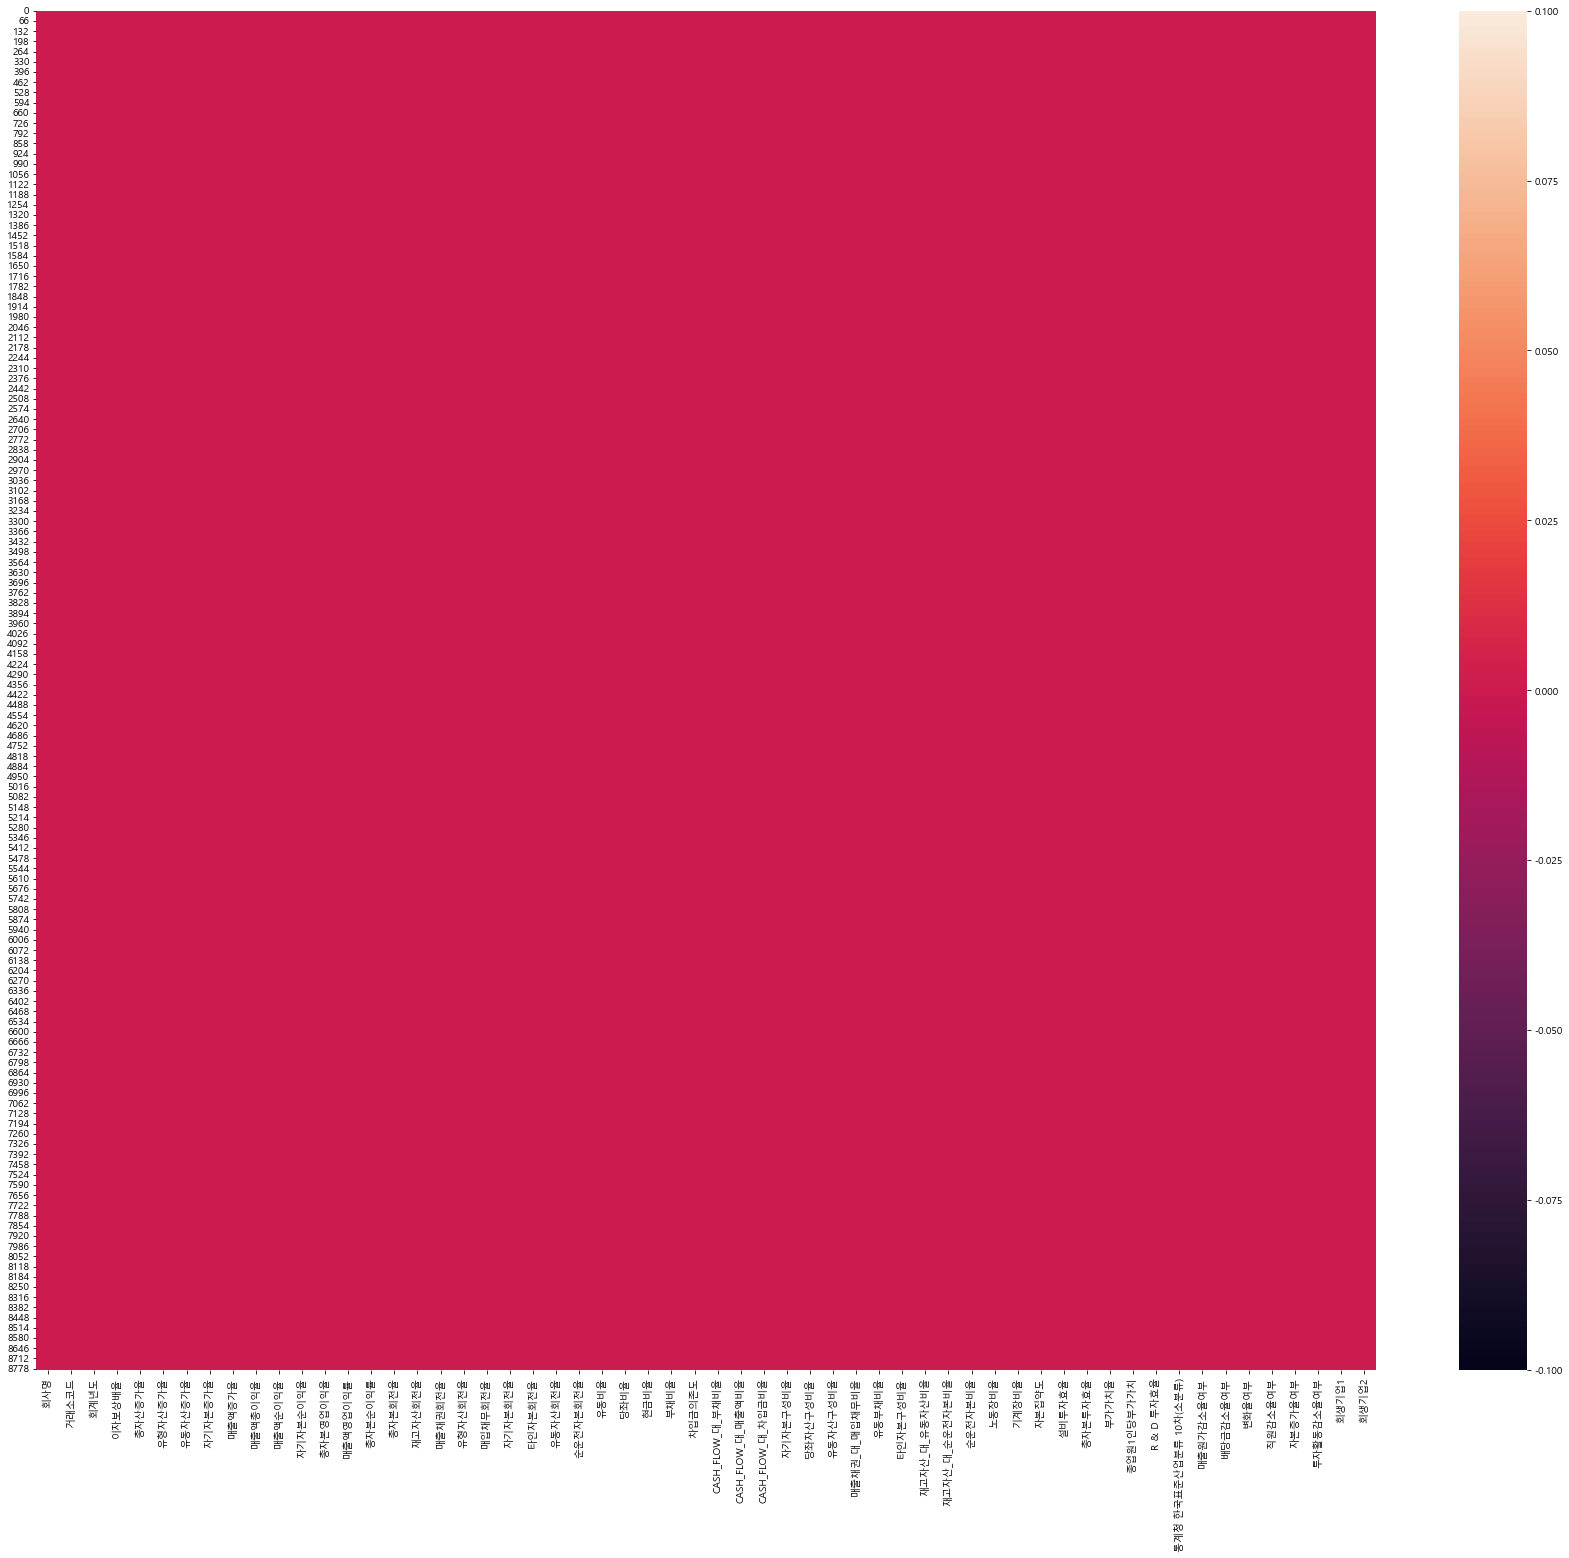

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

### 아직 결정된건 아니지만 일단 남은 결측치 평균으로 채워넣고 남는 결측치는 제거한다

In [397]:
# means = lambda x: x.fillna(x.mean())
# df = df.groupby('회사명').apply(means)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.isna().sum()

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   회사명                    8785 non-null   object 
 1   거래소코드                  8785 non-null   int64  
 2   회계년도                   8785 non-null   object 
 3   이자보상배율                 8785 non-null   float64
 4   총자산증가율                 8785 non-null   float64
 5   유형자산증가율                8785 non-null   float64
 6   유동자산증가율                8785 non-null   float64
 7   자기자본증가율                8785 non-null   float64
 8   매출액증가율                 8785 non-null   float64
 9   매출액총이익율                8785 non-null   float64
 10  매출액순이익율                8785 non-null   float64
 11  자기자본순이익율               8785 non-null   float64
 12  총자본영업이익율               8785 non-null   float64
 13  매출액영업이익률               8785 non-null   float64
 14  총자본순이익률                8785 non-null   float64
 15  총자본회

In [399]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '통계청 한국표준산업분류 10차(소분류)',
       '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부',
       '회생기업1', '회생기업2'],
      dtype='object')

### 아상치 확인

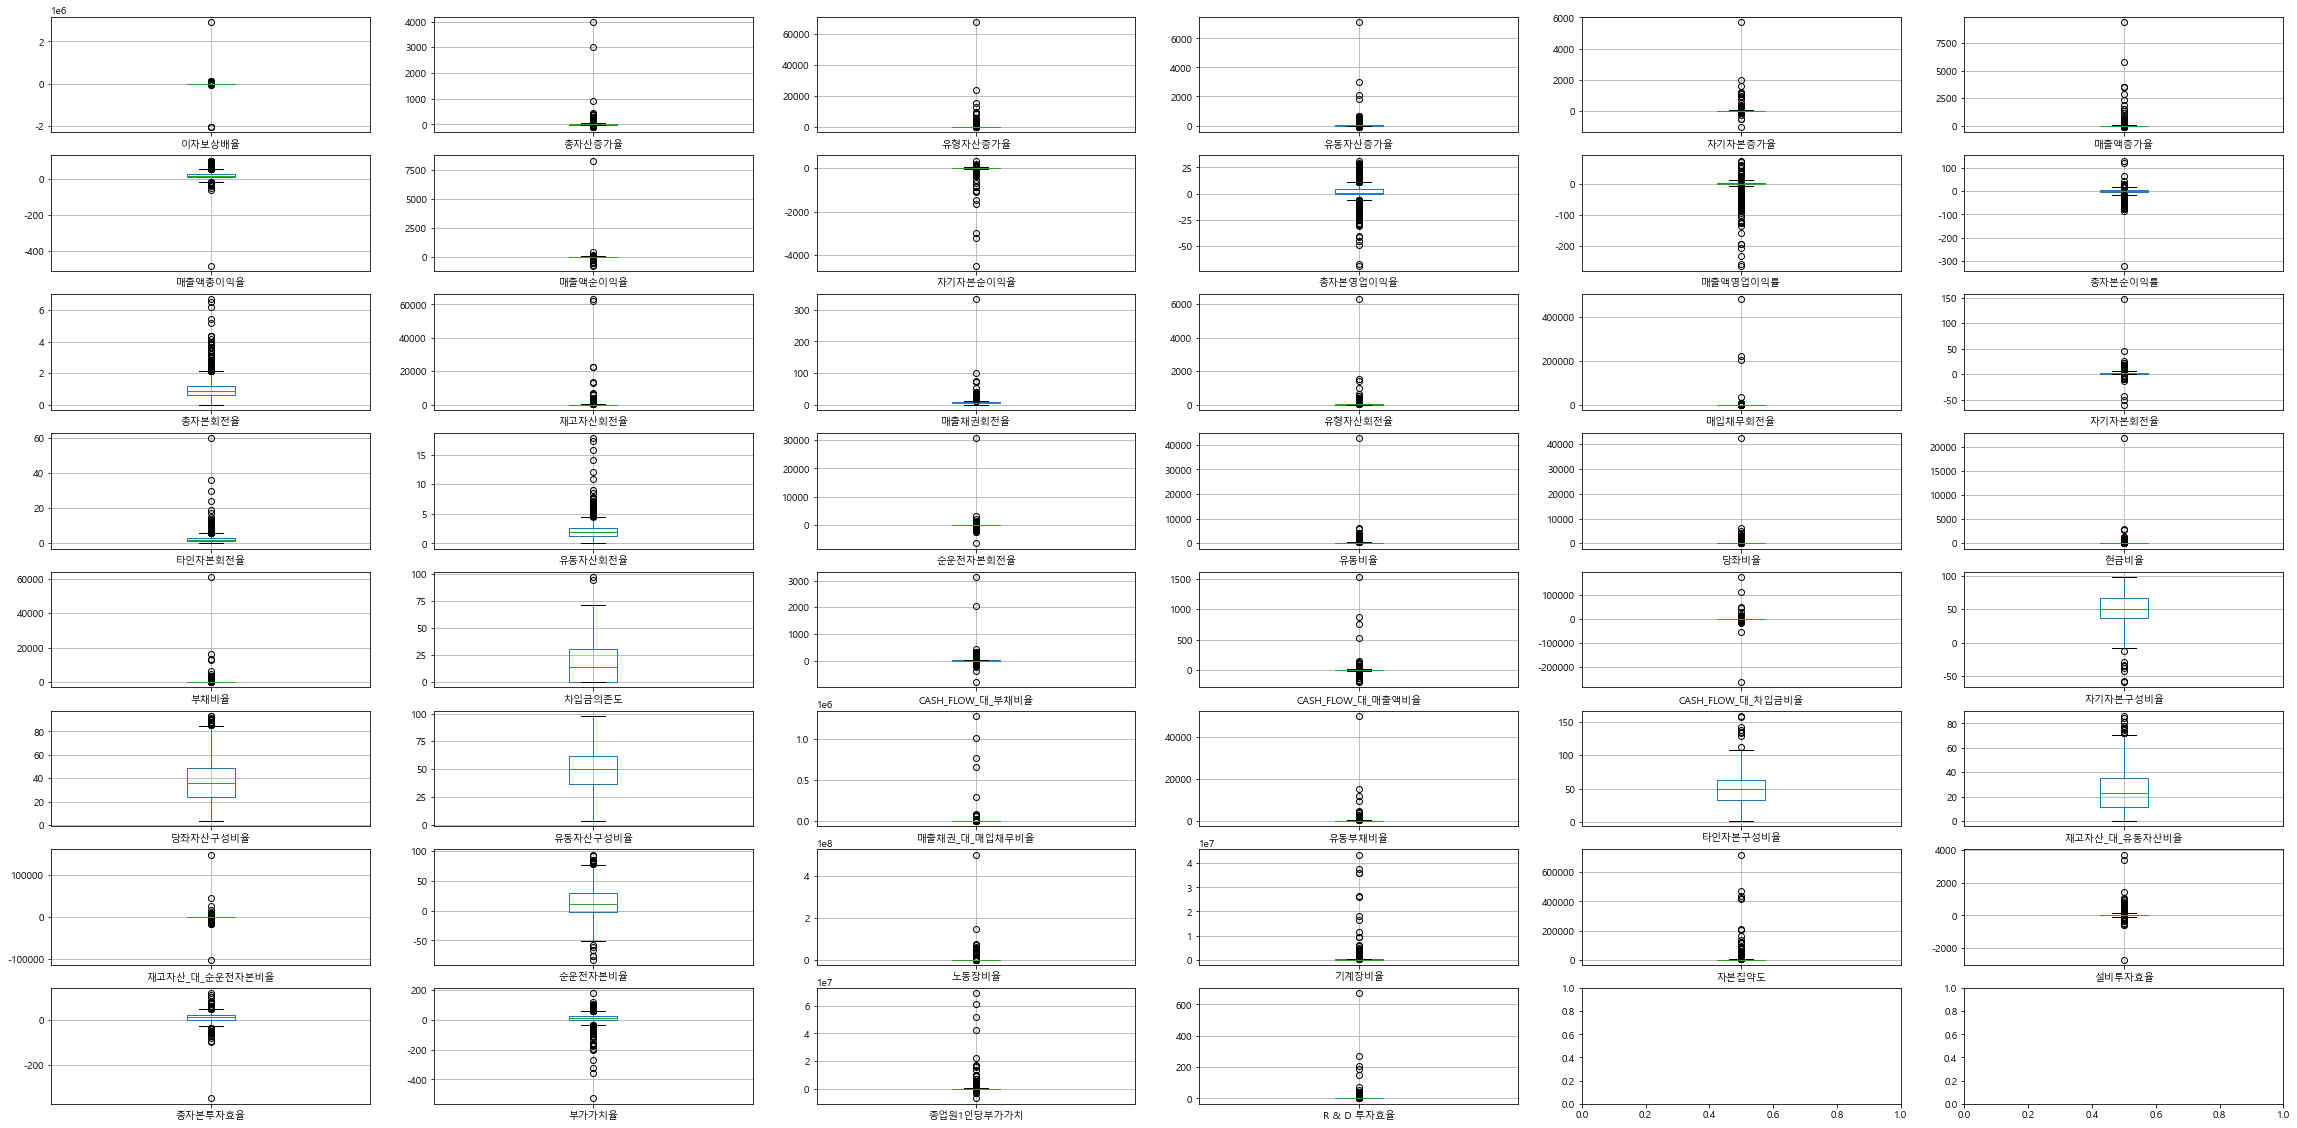

In [357]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df_2011.boxplot(column='이자보상배율', ax=axes[0,0])
df_2011.boxplot(column='총자산증가율', ax=axes[0,1])
df_2011.boxplot(column='유형자산증가율', ax=axes[0,2])
df_2011.boxplot(column='유동자산증가율', ax=axes[0,3])
df_2011.boxplot(column='자기자본증가율', ax=axes[0,4])
df_2011.boxplot(column='매출액증가율', ax=axes[0,5])
df_2011.boxplot(column='매출액총이익율', ax=axes[1,0])
df_2011.boxplot(column='매출액순이익율', ax=axes[1,1])
df_2011.boxplot(column='자기자본순이익율', ax=axes[1,2])
df_2011.boxplot(column='총자본영업이익율', ax=axes[1,3])
df_2011.boxplot(column='매출액영업이익률', ax=axes[1,4])
df_2011.boxplot(column='총자본순이익률', ax=axes[1,5])
df_2011.boxplot(column='총자본회전율', ax=axes[2,0])
df_2011.boxplot(column='재고자산회전율', ax=axes[2,1])
df_2011.boxplot(column='매출채권회전율', ax=axes[2,2])
df_2011.boxplot(column='유형자산회전율', ax=axes[2,3])
df_2011.boxplot(column='매입채무회전율', ax=axes[2,4])
df_2011.boxplot(column='자기자본회전율', ax=axes[2,5])
df_2011.boxplot(column='타인자본회전율', ax=axes[3,0])
df_2011.boxplot(column='유동자산회전율', ax=axes[3,1])
df_2011.boxplot(column='순운전자본회전율', ax=axes[3,2])
df_2011.boxplot(column='유동비율', ax=axes[3,3])
df_2011.boxplot(column='당좌비율', ax=axes[3,4])
df_2011.boxplot(column='현금비율', ax=axes[3,5])
df_2011.boxplot(column='부채비율', ax=axes[4,0])
df_2011.boxplot(column='차입금의존도', ax=axes[4,1])
df_2011.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df_2011.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df_2011.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df_2011.boxplot(column='자기자본구성비율', ax=axes[4,5])
df_2011.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df_2011.boxplot(column='유동자산구성비율', ax=axes[5,1])
df_2011.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df_2011.boxplot(column='유동부채비율', ax=axes[5,3])
df_2011.boxplot(column='타인자본구성비율', ax=axes[5,4])
df_2011.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df_2011.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df_2011.boxplot(column='순운전자본비율', ax=axes[6,1])
df_2011.boxplot(column='노동장비율', ax=axes[6,2])
df_2011.boxplot(column='기계장비율', ax=axes[6,3])
df_2011.boxplot(column='자본집약도', ax=axes[6,4])
df_2011.boxplot(column='설비투자효율', ax=axes[6,5])
df_2011.boxplot(column='총자본투자효율', ax=axes[7,0])
df_2011.boxplot(column='부가가치율', ax=axes[7,1])
df_2011.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df_2011.boxplot(column='R & D 투자효율', ax=axes[7,3])

plt.show()

In [358]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '통계청 한국표준산업분류 10차(소분류)',
       '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부',
       '회생기업1', '회생기업2'],
      dtype='object')

### 이상치 조정

In [359]:
from scipy.stats.mstats import winsorize
df1 = df.copy()
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

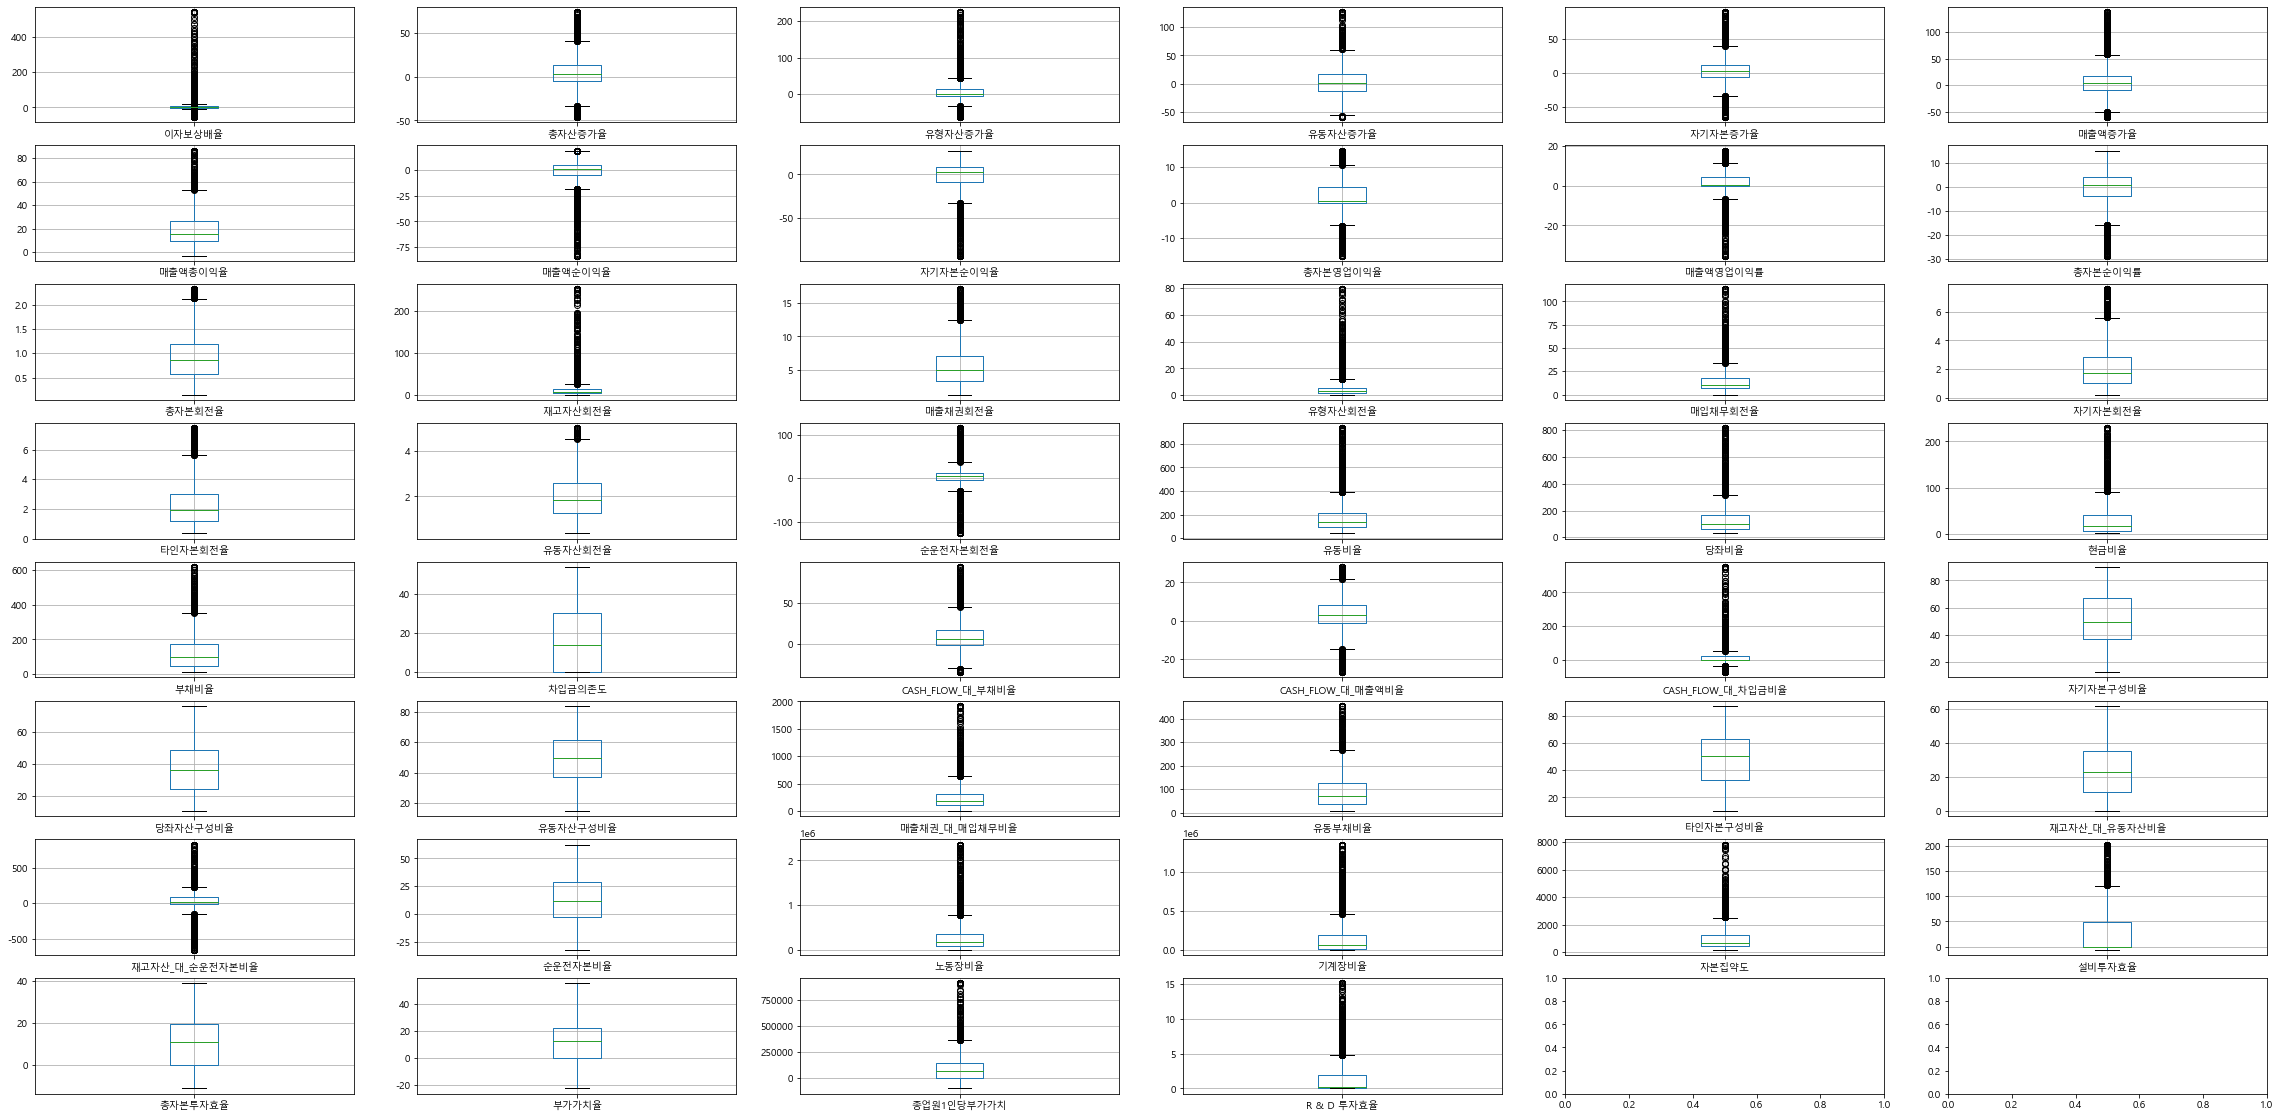

In [360]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df1.boxplot(column='R & D 투자효율', ax=axes[7,3])

plt.show()

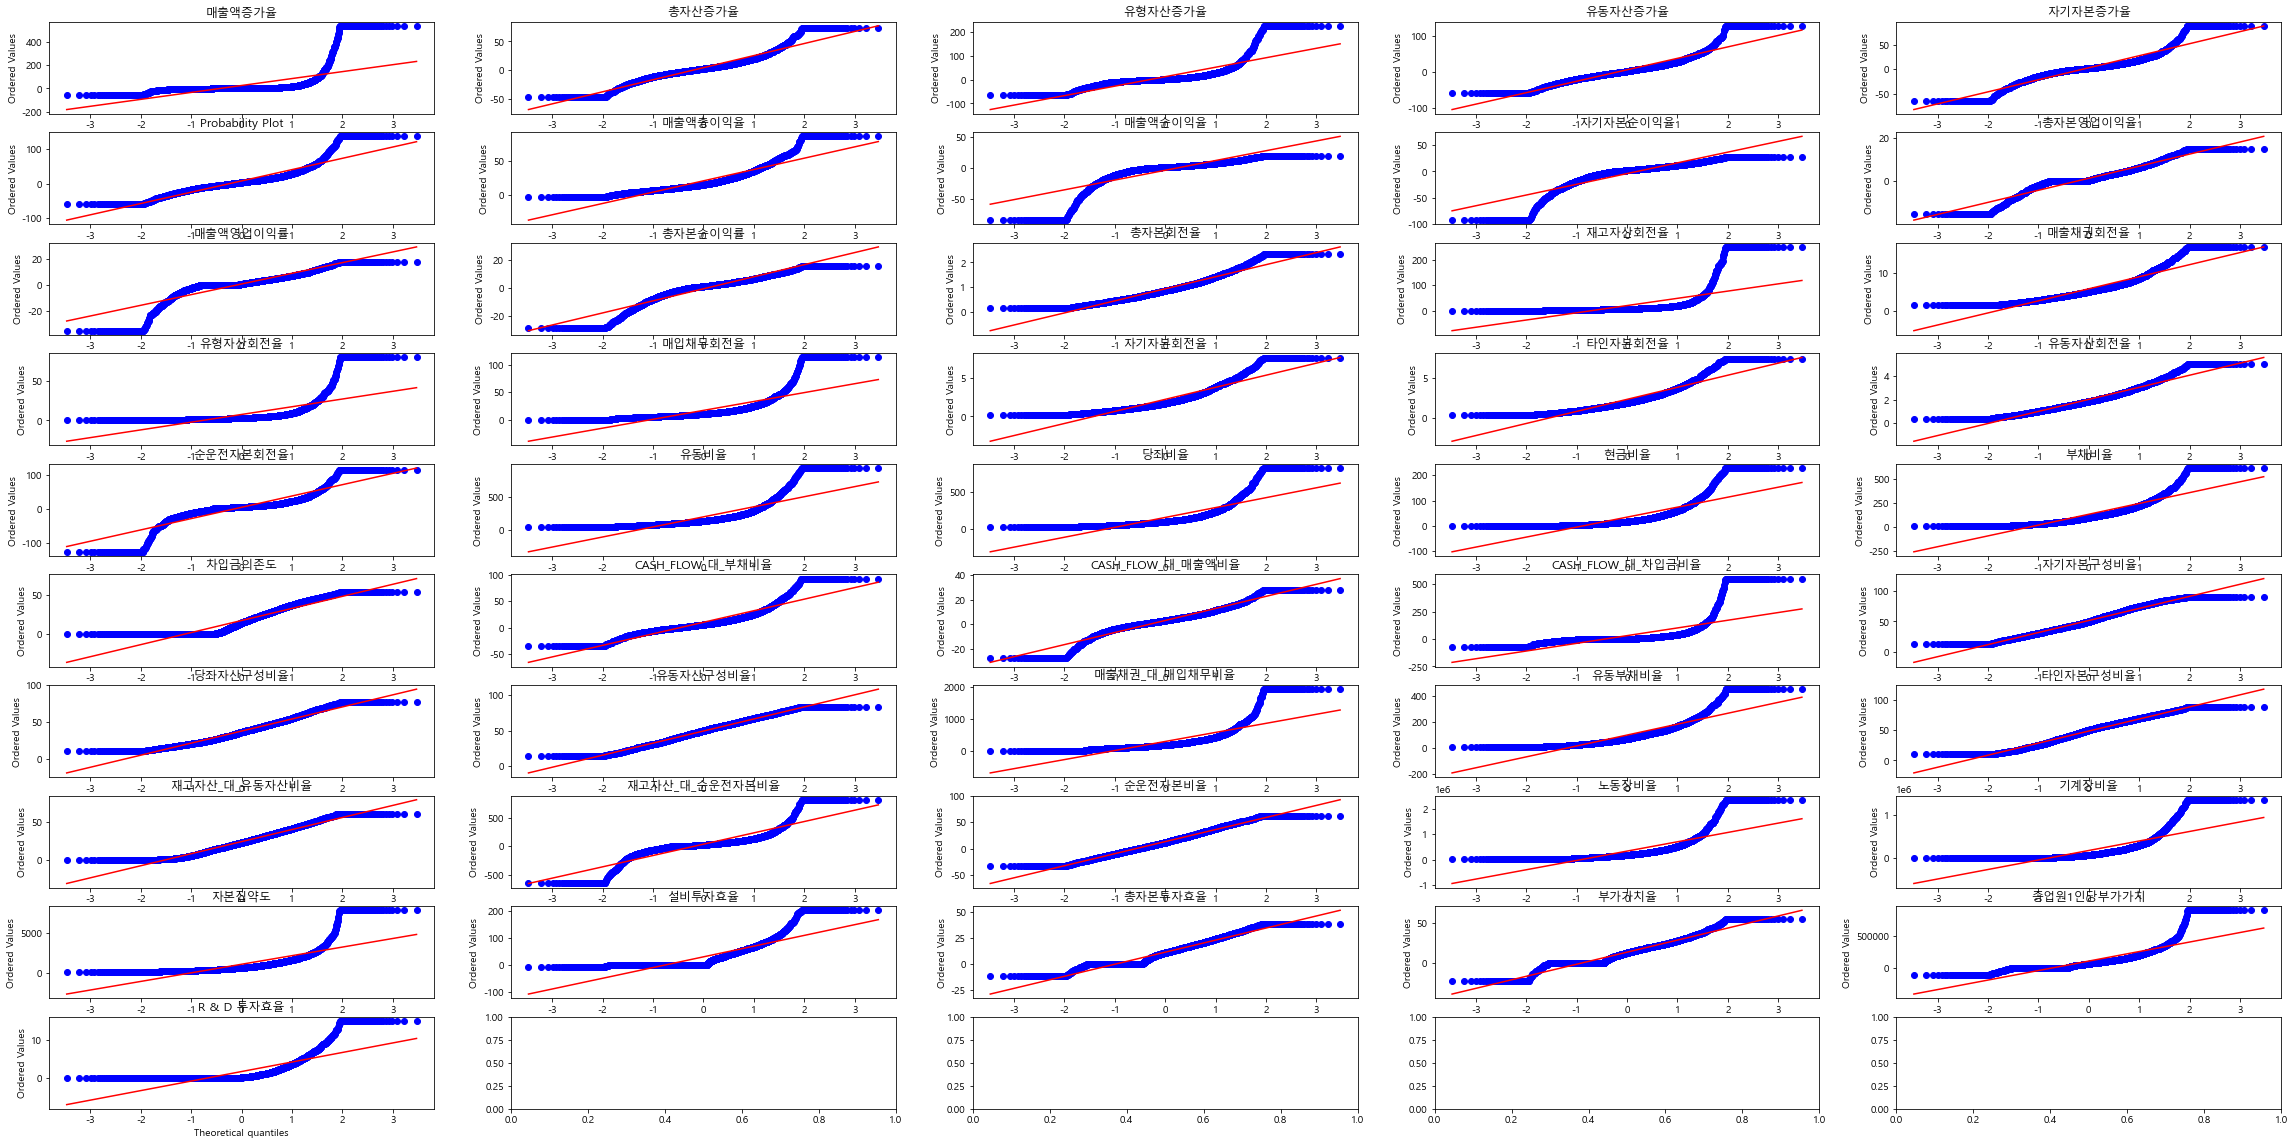

In [361]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")
stats.probplot(df1['R & D 투자효율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("R & D 투자효율")

plt.show()

In [362]:
df1.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '통계청 한국표준산업분류 10차(소분류)',
       '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부',
       '회생기업1', '회생기업2'],
      dtype='object')

In [1069]:
x = df_2016[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율']]
y = df_2016['회생기업2']

### 정규화 하고 정규성 보기

In [1070]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()
ss_sc = SS.fit_transform(x)
# ss_sc_iqr = SS.fit_transform(df)
ss_sc2 = pd.DataFrame(ss_sc)
# ss_sc_iqr = pd.DataFrame(ss_sc_iqr)
rs_sc = RS.fit_transform(x)
# rs_sc_iqr = RS.fit_transform(df)
rs_sc2 = pd.DataFrame(rs_sc)
# rs_sc_iqr2 = pd.DataFrame(rs_sc_iqr)
mi_sc = MIN.fit_transform(x)
mi_sc2 = pd.DataFrame(mi_sc)

In [1071]:
ss_sc2.columns = ['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율']

In [1072]:
ss_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,...,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율
0,-0.200813,-0.017896,-0.282059,-0.038768,-0.073623,-0.453569,0.145595,0.190615,0.450679,0.476641,...,0.011478,-0.545948,0.091233,-0.121393,-0.039760,-0.103755,-0.045966,0.351739,-0.034617,-0.099470
1,-0.192465,-0.017896,-0.172477,-0.033978,-0.102878,-0.445101,0.120268,0.276388,0.495016,0.240277,...,-2.533361,-0.607256,-0.078328,-0.052949,-0.100234,0.000831,0.661800,0.132380,-0.061449,-0.099470
2,0.285421,-0.017896,-0.307898,0.017347,-0.038402,-0.292662,0.067617,0.094201,-0.070623,0.103785,...,-0.014031,-0.007444,-0.101190,-0.119940,-0.028847,-0.138010,-0.720116,-0.364833,-0.090518,1.078614
3,0.209473,-0.017896,0.375783,0.097950,-0.157200,-0.284193,-0.221044,-0.124261,-1.557944,-1.423840,...,-0.030443,1.735761,-0.091874,-0.120681,-0.104141,-0.138010,-0.566095,-0.108352,-0.087898,-0.050950
4,-0.278594,-0.017896,-0.160732,-0.052247,-0.066451,-0.397581,0.100773,0.115483,0.288108,0.224880,...,0.104441,-0.341324,-0.083361,-0.037425,-0.105126,-0.029586,0.410598,0.191439,-0.072396,-0.059512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,0.101963,-0.017896,-0.238367,0.542113,0.018405,1.611879,-0.116382,-0.632610,-0.070623,0.103785,...,0.089533,-0.184732,-0.085864,-0.116989,-0.093421,-0.138010,-0.720116,-0.364833,-0.090518,-0.082178
3120,-0.652229,-0.017896,-0.455064,-0.069415,-0.243760,-0.175040,0.095021,0.087914,-0.028972,0.113356,...,-0.030962,1.499897,-0.102776,-0.120256,-0.107363,-0.138010,0.911779,0.131256,-0.068104,-0.099470
3121,-0.635736,-0.017896,-0.801544,-0.085363,-0.407577,-0.599421,0.036138,-0.041874,-0.242598,0.028049,...,0.096148,-0.524860,0.466158,1.004480,0.683096,-0.068806,-0.318560,-0.132537,0.240097,-0.099470
3122,0.234517,-0.017896,0.212409,-0.065160,-0.100251,-0.369822,0.106925,0.145633,0.325728,0.201160,...,-0.138362,-0.918487,-0.020124,-0.073990,-0.043153,-0.073665,-0.155371,-0.138724,-0.045626,-0.099302


### 스탠다드 정규화

In [1073]:
# from matplotlib.pyplot import imread

# fig, axes = plt.subplots(8, 6)
# fig.set_size_inches((40,20))

# # ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
# ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
# ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
# ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
# ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
# ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
# ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
# ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
# ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
# ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
# ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
# ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
# ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
# ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
# ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
# ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
# ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
# ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
# ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
# ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
# ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
# ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
# ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
# ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
# ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
# ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
# ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
# ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
# ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
# ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
# ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
# ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
# ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
# ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
# ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
# ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
# ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
# ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
# ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
# ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
# ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
# ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
# ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
# ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
# ss_sc2.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
# ss_sc2.boxplot(column='R & D 투자효율', ax=axes[7,3])
# plt.show()

In [1074]:
# # 정규성 qqplot
# # 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
# from matplotlib.pyplot import imread
# import scipy.stats as stats

# fig, axes = plt.subplots(9,5)
# fig.set_size_inches((40,20))

# # stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
# # axes[0,0].title.set_text("이자보상배율")
# stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
# axes[0,1].title.set_text("총자산증가율")
# stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
# axes[0,2].title.set_text("유형자산증가율")
# stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
# axes[0,3].title.set_text("유동자산증가율")
# stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
# axes[0,4].title.set_text("자기자본증가율")
# stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
# axes[0,0].title.set_text("매출액증가율")
# stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
# axes[1,1].title.set_text("매출액총이익율")
# stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
# axes[1,2].title.set_text("매출액순이익율")
# stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
# axes[1,3].title.set_text("자기자본순이익율")
# stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
# axes[1,4].title.set_text("총자본영업이익율")
# stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
# axes[2,0].title.set_text("매출액영업이익률")
# stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
# axes[2,1].title.set_text("총자본순이익률")
# stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
# axes[2,2].title.set_text("총자본회전율")
# stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
# axes[2,3].title.set_text("재고자산회전율")
# stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
# axes[2,4].title.set_text("매출채권회전율")
# stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
# axes[3,0].title.set_text("유형자산회전율")
# stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
# axes[3,1].title.set_text("매입채무회전율")
# stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
# axes[3,2].title.set_text("자기자본회전율")
# stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
# axes[3,3].title.set_text("타인자본회전율")
# stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
# axes[3,4].title.set_text("유동자산회전율")
# stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
# axes[4,0].title.set_text("순운전자본회전율")
# stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
# axes[4,1].title.set_text("유동비율")
# stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
# axes[4,2].title.set_text("당좌비율")
# stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
# axes[4,3].title.set_text("현금비율")
# stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
# axes[4,4].title.set_text("부채비율")
# stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
# axes[5,0].title.set_text("차입금의존도")
# stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
# axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
# stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
# axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
# stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
# axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
# stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
# axes[5,4].title.set_text("자기자본구성비율")
# stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
# axes[6,0].title.set_text("당좌자산구성비율")
# stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
# axes[6,1].title.set_text("유동자산구성비율")
# stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
# axes[6,2].title.set_text("매출채권_대_매입채무비율")
# stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
# axes[6,3].title.set_text("유동부채비율")
# stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
# axes[6,4].title.set_text("타인자본구성비율")
# stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
# axes[7,0].title.set_text("재고자산_대_유동자산비율")
# stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
# axes[7,1].title.set_text("재고자산_대_순운전자본비율")
# stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
# axes[7,2].title.set_text("순운전자본비율")
# stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
# axes[7,3].title.set_text("노동장비율")
# stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
# axes[7,4].title.set_text("기계장비율")
# stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
# axes[8,0].title.set_text("자본집약도")
# stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
# axes[8,1].title.set_text("설비투자효율")
# stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
# axes[8,2].title.set_text("총자본투자효율")
# stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
# axes[8,3].title.set_text("부가가치율")
# stats.probplot(ss_sc2['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("종업원1인당부가가치")
# stats.probplot(ss_sc2['R & D 투자효율'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("R & D 투자효율")

# plt.show()

### 이상치 조정

In [1075]:
from scipy.stats.mstats import winsorize
ss_sc3 = ss_sc2.copy()
for col in ss_sc3.columns:
     ss_sc3[col] = winsorize(ss_sc3[col], limits= 0.025)

### 샤피로

In [1076]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [1077]:
shap_pct(ss_sc3)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 1.401298464324817e-45
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 1.838593968945109e-38
매출액영업이익률 의 pvalue: 0.0
총자본순이익률 의 pvalue: 1.401298464324817e-44
총자본회전율 의 pvalue: 5.253875198344848e-30
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 2.355809168878427e-31
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
당좌비율 의 pvalue: 0.0
현금비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 9.80908925027372e-45
CASH_FLOW_대_부채비율 의 pvalue: 1.4854958749173437e-37
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
자기자본구성비율 의 pvalue: 6.334805504414396e-23
당좌자산구성비율 의 pvalue: 2.282950652275478e-28
유동자산구성비율 의 pvalue: 6.073330456570515e-18
매출채권_대_매입채무비율 의 pvalue: 0.0
유동부채비율 의 pvalue: 0.0
타인자본구성비율 의 pvalue: 6.348799896873016e-23
재고자산_대_유동자산비율 의 pvalue: 1.71

### 상관분석 및 다중공선성 확인

In [1078]:
ss_sc3_corr = ss_sc3.corr(method='pearson')

In [1079]:
mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))

In [1080]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
# plt.rc("axes", unicode_minus=False)
# plt.figure(figsize=(30,15))

# sns.heatmap(ss_sc3.corr(),annot=True, cmap='hot',mask=mask)

In [1081]:
ss_sc3 = ss_sc3.drop(['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','타인자본구성비율','재고자산_대_순운전자본비율',
                      '부가가치율','유형자산증가율','매입채무회전율','총자본회전율'],axis=1)

In [1082]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_sc3,i)for i in range(ss_sc3.shape[1])]
vif['features'] = ss_sc3.columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,10.286327,CASH_FLOW_대_차입금비율
1,10.157050,노동장비율
2,9.431617,자본집약도
3,9.168534,종업원1인당부가가치
4,8.309270,순운전자본비율
5,6.457784,당좌자산구성비율
6,6.163764,재고자산회전율
7,6.030652,자기자본회전율
8,4.944106,부채비율
9,4.865833,유동자산회전율


In [1083]:
shap_pct(ss_sc3)

총자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 1.401298464324817e-45
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 1.838593968945109e-38
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 2.355809168878427e-31
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 9.80908925027372e-45
CASH_FLOW_대_부채비율 의 pvalue: 1.4854958749173437e-37
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
당좌자산구성비율 의 pvalue: 2.282950652275478e-28
매출채권_대_매입채무비율 의 pvalue: 0.0
재고자산_대_유동자산비율 의 pvalue: 1.7192631792640833e-30
순운전자본비율 의 pvalue: 3.5464177623128985e-18
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.0
자본집약도 의 pvalue: 0.0
설비투자효율 의 pvalue: 0.0
총자본투자효율 의 pvalue: 1.8334736713582965e-23
종업원1인당부가가치 의 pvalue: 0.0
R & D 투자효율 의 pvalue: 0.0


In [1084]:
q1 = df_2016.iloc[:,50:56]
ss_sc4 = pd.concat([ss_sc3,q1],axis=1)
ss_sc4

,총자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,재고자산회전율,매출채권회전율,...,설비투자효율,총자본투자효율,종업원1인당부가가치,R & D 투자효율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부
0,-0.200813,-0.282059,-0.038768,-0.073623,-0.453569,0.145595,0.190615,0.450679,-0.030714,0.125664,...,-0.103755,-0.045966,-0.034617,-0.099470,0,0,0,0,0,1
1,-0.192465,-0.172477,-0.033978,-0.102878,-0.445101,0.120268,0.276388,0.495016,-0.042559,-0.065144,...,0.000831,0.661800,-0.061449,-0.099470,0,0,0,0,0,0
2,0.285421,-0.307898,0.017347,-0.038402,-0.292662,0.067617,0.094201,-0.070623,-0.043244,-0.106449,...,-0.138010,-0.720116,-0.090518,0.297925,0,0,0,0,0,0
3,0.209473,0.375783,0.097950,-0.157200,-0.284193,-0.221044,-0.124261,-1.557944,-0.044317,-0.199294,...,-0.138010,-0.566095,-0.087898,-0.050950,0,0,0,0,0,0
4,-0.278594,-0.160732,-0.052247,-0.066451,-0.397581,0.100773,0.115483,0.288108,-0.042808,-0.027128,...,-0.029586,0.410598,-0.072396,-0.059512,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,0.101963,-0.238367,0.332082,0.018405,1.611879,-0.116382,-0.632610,-0.070623,-0.044313,0.080703,...,-0.138010,-0.720116,-0.090518,-0.082178,0,0,0,0,0,0
3120,-0.652229,-0.455064,-0.069415,-0.243760,-0.175040,0.095021,0.087914,-0.028972,-0.041656,-0.102062,...,-0.138010,0.911779,-0.068104,-0.099470,0,0,0,0,0,0
3121,-0.635736,-0.781460,-0.085363,-0.407577,-0.599421,0.036138,-0.041874,-0.242598,-0.037918,-0.095483,...,-0.068806,-0.318560,0.238095,-0.099470,0,1,0,0,0,0
3122,0.234517,0.212409,-0.065160,-0.100251,-0.369822,0.106925,0.145633,0.325728,-0.041242,0.005404,...,-0.073665,-0.155371,-0.045626,-0.099302,0,0,0,0,0,1


### 회귀분석

In [1085]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = y
feature = ss_sc4

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  회생기업2   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.956
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           0.000436
Time:                        16:59:52   Log-Likelihood:                 1508.9
No. Observations:                3124   AIC:                            -2940.
Df Residuals:                    3085   BIC:                            -2704.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0391      0.027      1.444      0.149      -0.014       0.092
총자산증가율                0.0039      0.009      0.426      0.670      -0.014       0.022
유동자산증가율               0.0058      0.009      0.643      0.520      -0.012       0.024
자기자본증가율              -0.0371      0.041     -0.905      0.366      -0.117       0.043
매출액증가율               -0.0024      0.013     -0.180      0.857      -0.028       0.024
매출액총이익율               0.0005      0.004      0.132      0.895      -0.007       0.008
매출액순이익율              -0.0143      0.023     -0.607      0.544      -0.060       0.032
자기자본순이익율             -0.0005      0.014     -0.040      0.968      -0.027       0.026
총자본영업이익율              0.0173      0.005      3.246      0.001       0.007       0.028
재고자산회전율               0.0398      0.164      0.243      0.808      -0.281       0.361
매출채권회전율              -0.0248      0.023     -1.078      0.281      -0.070       0.020
유형자산회전율              -0.0132      0.016     -0.802      0.423      -0.045       0.019
자기자본회전율               0.0085      0.010      0.893      0.372      -0.010       0.027
타인자본회전율               0.0061      0.006      1.094      0.274      -0.005       0.017
유동자산회전율               0.0005      0.007      0.072      0.943      -0.013       0.014
순운전자본회전율             -0.0263      0.022     -1.212      0.226      -0.069       0.016
유동비율                 -0.0146      0.011     -1.359      0.174      -0.036       0.006
부채비율                 -0.0575      0.041     -1.406      0.160      -0.138       0.023
차입금의존도                0.0054      0.004      1.341      0.180      -0.003       0.013
CASH_FLOW_대_부채비율     -0.0272      0.043     -0.630      0.529      -0.112       0.058
CASH_FLOW_대_매출액비율     0.0325      0.052      0.628      0.530      -0.069       0.134
CASH_FLOW_대_차입금비율     0.4838      1.198      0.404      0.686      -1.865       2.833
당좌자산구성비율             -0.0034      0.007     -0.490      0.624      -0.017       0.010
매출채권_대_매입채무비율        -0.0808      0.067     -1.199      0.231      -0.213       0.051
재고자산_대_유동자산비율         0.0012      0.005      0.254      0.799      -0.008       0.010
순운전자본비율               0.0063      0.008      0.764      0.445      -0.010       0.022
노동장비율                 0.0604      0.099      0.609      0.542      -0.134       0.255
기계장비율                -0.0080      0.045     -0.180      0.857      -0.095       0.079
자본집약도                 0.0186      0.082      0.228      0.820      -0.141       0.178
설비투자효율               -0.0273      0.021     -1.312      0.189      -0.068       0.013
총자본투자효율               0.0002      0.007      0.034      0.973      -0.013       0.013
종업원1인당부가가치            0.0895      0.097      0.926      0.354      -0.100       0.279
R & D 투자효율            0.0318      0.039      0.824      0.410      -0.044

다행히 다중공선성은 사라졌군...

### 후진제거법

In [1086]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(40,25))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(ss_sc4,y)

                            OLS Regression Results                            
Dep. Variable:                  회생기업2   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     16.22
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.86e-10
Time:                        17:00:19   Log-Likelihood:                 1495.8
No. Observations:                3124   AIC:                            -2984.
Df Residuals:                    3120   BIC:                            -2960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0297      0.004      7.978      0.0

In [1087]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['총자본영업이익율', '종업원1인당부가가치', '매출원가감소율여부']])

,VIF Factor,features
0,1.215493,종업원1인당부가가치
1,1.215493,총자본영업이익율
2,NaN,매출원가감소율여부


### 또다른 후진제거법

In [1088]:
# 반복적 변수 제거를 하여 변수별 중요도를 도출
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 모델 입력, n_features_to_select: 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
rfe = RFE(lr, n_features_to_select=8, step=1)
model = rfe.fit(ss_sc4,y)
# 선택될 변수
print(model.support_)

# 변수 중요도(숫자 높을수록 불필요하다)
print(model.ranking_)

[False False False False False False False False False False False False
 False False False False  True False False False  True False  True False
 False  True False  True False False  True False  True False False False
  True False]
[24 16  7 26 30 19 28  6  4 13 12 14 20 29  3 15  1 21  8  9  1 23  1 27
 22  1 18  1  5 31  1 11  1 10  2 25  1 17]


In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['유형자산증가율', '매출액증가율', '순운전자본회전율', '자기자본순이익율', 'CASH_FLOW_대_매출액비율',
       '노동장비율', '종업원1인당부가가치','R & D 투자효율','배당금감소율여부']])

,VIF Factor,features
0,2.756698,노동장비율
1,2.734620,종업원1인당부가가치
2,1.366098,자기자본순이익율
3,1.254462,CASH_FLOW_대_매출액비율
4,1.145444,매출액증가율
5,1.107968,유형자산증가율
6,1.102561,R & D 투자효율
7,1.082643,배당금감소율여부
8,1.008920,순운전자본회전율


### 릿지

In [1089]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc4, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.031 -0.028 -0.023 -0.016 -0.016]
 5 folds 의 개별 RMSE scores :  [0.175 0.166 0.153 0.127 0.126]
 5 folds 의 평균 RMSE : 0.149 


In [1090]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 릿지에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
ridge_alpha = [0,1,2,3,4,5]
coeff_lasso_df =get_linear_reg_eval('Ridge', params=ridge_alpha, X_data_n=ss_sc4, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(ridge_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.150 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.150 
alpha 2일 때 5 폴드 세트의 평균 RMSE: 0.150 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.150 
alpha 4일 때 5 폴드 세트의 평균 RMSE: 0.150 
alpha 5일 때 5 폴드 세트의 평균 RMSE: 0.150 


,alpha:0,alpha:1,alpha:2,alpha:3,alpha:4,alpha:5
CASH_FLOW_대_차입금비율,0.483807,0.007646,0.003893,0.002621,0.001981,0.001594
종업원1인당부가가치,0.089509,0.071580,0.062469,0.056584,0.052316,0.048999
매출원가감소율여부,0.079687,0.076131,0.072434,0.069016,0.065885,0.063019
노동장비율,0.060398,0.051034,0.045479,0.041913,0.039331,0.037317
재고자산회전율,0.039822,0.018846,0.012228,0.009052,0.007183,0.005949
변화율여부,0.033375,0.032191,0.031322,0.030515,0.029760,0.029049
CASH_FLOW_대_매출액비율,0.032472,0.028391,0.024434,0.021369,0.018925,0.016931
R & D 투자효율,0.031835,0.029626,0.027865,0.026229,0.024747,0.023410
자본집약도,0.018600,0.031199,0.035804,0.037603,0.038200,0.038209
총자본영업이익율,0.017293,0.017385,0.017328,0.017274,0.017224,0.017179


진짜 릿지는 못 써먹겠다....ㅂㄷㅂㄷ

### 라쏘

In [1091]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc4, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.031 -0.028 -0.023 -0.016 -0.016]
 5 folds 의 개별 RMSE scores :  [0.176 0.167 0.153 0.126 0.126]
 5 folds 의 평균 RMSE : 0.150 


In [1092]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.0005,0.0006,0.0007,0.0008,0.001]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=ss_sc4, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.0005일 때 5 폴드 세트의 평균 RMSE: 0.149 
alpha 0.0006일 때 5 폴드 세트의 평균 RMSE: 0.149 
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.149 
alpha 0.0008일 때 5 폴드 세트의 평균 RMSE: 0.149 
alpha 0.001일 때 5 폴드 세트의 평균 RMSE: 0.149 


,alpha:0.0005,alpha:0.0006,alpha:0.0007,alpha:0.0008,alpha:0.001
총자본영업이익율,0.016941,0.017135,0.017218,0.017146,0.016914
자본집약도,0.012206,0.000000,0.000000,0.000000,0.000000
차입금의존도,0.003357,0.002982,0.002565,0.002316,0.001926
순운전자본비율,0.002600,0.001403,0.000187,0.000000,0.000000
유동자산회전율,0.002343,0.002347,0.002329,0.002297,0.002390
타인자본회전율,0.001965,0.001465,0.001148,0.000950,0.000441
유동자산증가율,0.001179,0.000775,0.000201,0.000000,0.000000
재고자산_대_유동자산비율,0.001144,0.001255,0.001531,0.001575,0.001594
매출액총이익율,0.000257,0.000119,0.000025,0.000000,0.000000
노동장비율,0.000000,0.000000,0.000000,0.000000,0.000000


일단 0.007로 선택 했습니다

In [1098]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['총자본영업이익율', '차입금의존도', '순운전자본비율', '유동자산회전율', '타인자본회전율',
         '유동자산증가율','재고자산_대_유동자산비율','당좌자산구성비율']])

,VIF Factor,features
0,8.399849,유동자산회전율
1,7.666513,타인자본회전율
2,7.167403,당좌자산구성비율
3,5.377670,순운전자본비율
4,3.241226,재고자산_대_유동자산비율
5,3.094438,차입금의존도
6,1.202065,총자본영업이익율
7,1.122793,유동자산증가율


In [939]:
e = df[['회사명','거래소코드','회계년도']]
e2 = pd.concat([e,ss_sc3],axis=1)
r = df[['매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부']]
r2 = pd.concat([e2,r],axis=1)
r2 = r2[['회사명','거래소코드','회계년도','유동자산회전율','총자본투자효율','재고자산_대_유동자산비율',
         '당좌자산구성비율','차입금의존도','총자본영업이익율','자기자본순이익율',
         '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부']]
r2.to_csv('스탠다드라쏘데이터.csv',encoding='cp949',index=False)
r2

,회사명,거래소코드,회계년도,유동자산회전율,총자본투자효율,재고자산_대_유동자산비율,당좌자산구성비율,차입금의존도,총자본영업이익율,자기자본순이익율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부
0,CMG제약,58820,2011-12,-0.579674,0.065883,-0.328854,0.473677,-0.544291,0.224478,0.021417,1,0,0,0,0,0
1,CMG제약,58820,2012-12,-1.184001,-0.633770,-1.013495,2.241422,-0.977133,-1.454959,-0.174216,0,0,0,0,1,1
2,CMG제약,58820,2013-12,-1.217114,0.053889,-0.670290,1.264003,-0.988045,0.092356,0.116493,0,0,0,0,0,0
3,CMG제약,58820,2014-12,-1.051546,0.033899,-0.359519,0.141445,-0.987439,0.007908,0.112066,0,0,0,1,0,0
4,CMG제약,58820,2015-12,-0.794914,-0.224830,-0.158431,-0.054719,-0.987439,-0.709905,0.028374,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,흥아해운,3280,2015-12,2.317782,0.088158,-0.886120,-1.248712,0.498409,0.303478,0.173834,0,0,0,0,0,0
8781,흥아해운,3280,2016-12,2.317782,-0.033496,-0.345366,-1.545793,0.165593,-0.007075,0.009612,0,1,0,0,0,1
8782,흥아해운,3280,2017-12,2.317782,-0.350482,-0.364826,-1.503272,0.400201,-0.295834,-0.392194,0,0,0,0,0,0
8783,흥아해운,3280,2018-12,2.317782,-0.418448,-0.359519,-1.510642,0.360190,-0.718077,-0.851341,0,1,0,0,0,0


12개 선정입니다

### 엘라스틱

In [1094]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 엘라스틱에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
elastic_alpha = [0.0005,0.0006,0.0007,0.0008,0.1]
coeff_lasso_df =get_linear_reg_eval('ElasticNet', params=elastic_alpha, X_data_n=ss_sc4, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.0005일 때 5 폴드 세트의 평균 RMSE: 0.150 
alpha 0.0006일 때 5 폴드 세트의 평균 RMSE: 0.149 
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.149 
alpha 0.0008일 때 5 폴드 세트의 평균 RMSE: 0.149 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.150 


,alpha:0.0005,alpha:0.0006,alpha:0.0007,alpha:0.0008,alpha:0.1
자본집약도,0.033768,0.024707,0.013557,0.000824,0.0
매출원가감소율여부,0.021631,0.009746,0.000000,0.000000,0.0
총자본영업이익율,0.016752,0.016751,0.016915,0.017086,0.0
기계장비율,0.004467,0.000000,0.000000,0.000000,0.0
순운전자본비율,0.004266,0.003490,0.002711,0.001904,-0.0
차입금의존도,0.004013,0.003697,0.003391,0.003146,0.0
변화율여부,0.003851,0.000000,0.000000,0.000000,0.0
타인자본회전율,0.002929,0.002410,0.002015,0.001613,0.0
유동자산회전율,0.002451,0.002441,0.002345,0.002348,0.0
유동자산증가율,0.001504,0.001406,0.001217,0.000994,0.0


일단 여기도 0.0007로 선정 합니다

In [1105]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df1[['총자본영업이익율','총자본투자효율','재고자산_대_유동자산비율','당좌자산구성비율',
         '자기자본순이익율','차입금의존도','타인자본회전율','매출채권회전율','순운전자본비율','CASH_FLOW_대_매출액비율']])

,VIF Factor,features
0,6.765975,당좌자산구성비율
1,6.313841,타인자본회전율
2,4.945642,매출채권회전율
3,3.735131,순운전자본비율
4,3.574085,차입금의존도
5,3.572565,총자본투자효율
6,3.051869,재고자산_대_유동자산비율
7,2.456341,총자본영업이익율
8,2.020359,자기자본순이익율
9,1.320663,CASH_FLOW_대_매출액비율


### 교차검증 전 정확도 확인

13개 선정입니다

3개 공통을 추출한 결과 자기자본순이익율,CASH_FLOW_대_매출액비율 이렇게 2개 나왔네용;; 좀 더 늘리고 봐야되나...

In [134]:
# from numpy import arange

# from pandas import read_csv

# from sklearn.linear_model import LassoCV,RidgeCV

# from sklearn.model_selection import RepeatedKFold

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define model

# model = RidgeCV(alphas=arange(0, 1, 0.001), cv=cv, n_jobs=1)

# # fit model

# model.fit(ss_sc4, y)

# # summarize chosen configuration

# print('alpha: %f' % model.alpha_)